# 專案二 - 第十組 - 王力宏離婚事件分析
**組員：M104020021 劉雨瑈、M104020031 周駿嚴、M104020037 林元雅、M104020046 焦玉茹**<br>

### 大綱
**A. 動機和分析目的**
1.   套件說明

**B. 資料集的描述**
2.  資料前處理

    + 2.1 基本資料介紹
    + 2.2 資料清理
    + 2.3 Jieba中文斷詞、匯入字典
    + 2.4 去除停用字

**C. 資料的分析過程 與 視覺化的分析結果&解釋**

3. lexicon-base 情緒分析

    + 3.1 準備LIWC字典
    + 3.2 情緒字典與斷詞結果進行合併
    + 3.3 正負情緒分數聲量折線圖
    + 3.4 正負情緒分數比例折線圖
    + 3.5 文字雲
    + 3.6 情緒代表字
    + 3.7 歸類正負面文章
    + 3.8 正負情緒文章數量統計圖
    + 3.9 情緒關鍵字

4. LDA 主題模型

    + 4.1 訓練LDA模型
    + 4.2 查看 LDA 主題代表字
    + 4.3 查看 LDA 模型指標
    + 4.4 透過指標找出最佳主題數

5. LDA 視覺化呈現

    + 5.1 產生 LDAvis 結果
    + 5.2 查看 Document 主題時間上分佈

6. 社群網路圖

    + 6.1 基本網路圖
    + 6.2 資料篩選
    + 6.3 以日期篩選社群
    + 6.4 以主題篩選社群
    + 6.5 使用者是否受到歡迎

**D. 結論**

## A. 動機和分析目的

2021年底演藝圈十分不平靜，就在公投前夕，藝人王力宏與李靚蕾婚變風波點燃全台觀眾的「追劇」熱潮！李靚蕾12/17深夜突然發出超過5000字長文，控訴王力宏多年來各種惡行，包括婚內出軌，更爆出約炮、召妓等行徑。網友形容李靚蕾舉起「蕾神之槌」，王力宏遭受接連重擊，形象瞬間跌落谷底。風波更牽扯到徐若瑄、By2妹妹Yumi等知名藝人，加上王力宏爸爸跟李靚蕾哥哥跳出來加入混戰，更一度掩蓋了台灣四大公投的聲量，後來直到王力宏正式道歉，宣布暫時退出演藝圈才稍微平息。

因此，我們想要分析整體相關事件的脈絡，以及網友的看法與討論關鍵。

#### 1.套件說明
本次實作過程中使用到的相關套件。
+ pandas:提供高效能、簡易使用的資料格式與資料處理的函數。
+ jieba:中文斷詞套件
+ re:正規化表達式套件
+ matplotlib:繪圖工具
+ gensim: 主題模型函式庫
+ pyLDAvis: 互動式LDA視覺化套件
+ networkx: 網絡圖建構、繪製工具。

In [ ]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 155225 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [ ]:
#安裝pyLDAvis套件
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 7.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 38.4 MB/s 
     |████████████████████████████████| 11.3 MB 36.3 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=ab1fa81645c9031d8ea686e768f2584c9e41eaa5636da8ee304d843492ec406b
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take in

In [ ]:
!pip install -U pandas-profiling

     |████████████████████████████████| 261 kB 8.0 MB/s 
     |████████████████████████████████| 596 kB 52.2 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 102 kB 12.4 MB/s 
     |████████████████████████████████| 3.1 MB 49.9 MB/s 
     |████████████████████████████████| 303 kB 54.6 MB/s 
     |████████████████████████████████| 675 kB 60.8 MB/s 
     |████████████████████████████████| 10.9 MB 41.1 MB/s 
     |████████████████████████████████| 812 kB 58.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=93467ad7bce9584fe02d9c76e342808da32760aaa168748a376ea544c2176316
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=4c0574da8b0fe580c26431bcf844c919eab13743b45c3b937ebb7c8ac15f8cc1
 

In [ ]:
import pandas as pd
import jieba
import re
import matplotlib
import matplotlib.pyplot as plt
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import pyLDAvis.gensim_models
import numpy as np
import IPython
import networkx as nx
from wordcloud import WordCloud 
from datetime import datetime

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

--2022-01-10 16:21:07--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.141.139, 142.250.141.138, 142.250.141.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9qroq06tqtbg42v61fibv7mrt053i8mq/1641831600000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-01-10 16:21:08--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9qroq06tqtbg42v61fibv7mrt053i8mq/1641831600000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|74

In [ ]:
import matplotlib.font_manager as fm
fm.fontManager.ttflist += fm.createFontList([r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf'])

# 後續在相關函式中增加 plt.rcParams["font.family"] = "Taipei Sans TC Beta" 即可 # 將字體變成台北思源黑體

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/final report

/content/drive/MyDrive/final report


In [ ]:
# 設定圖的字體大小
font = {'size':14}
matplotlib.rc('font', **font)

In [ ]:
# 移除警告語，視覺上比較乾淨
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## B. 資料集的描述 

### 2.資料前處理
+ 資料收集：使用中山管院文字分析平台，來收集文本資料。
+ 資料清理：將文本內容轉為正規語句，例如：統一標點符號、去除特定標籤等等。
+ 斷詞：使用工具區分文章中的詞彙，以便於進行分析。
+ 去除停用字：將與分析無關的詞彙去除，例如：語助詞、連接詞等等，來避免影響後續分析結果。

#### 2.1 基本資料介紹
+ 資料來源: PTT Gossiping版 2021-12-14 ~ 2021-12-24 所有文章&評論
- 資料集： 
  - `raw_data/PTT_Gossip_Lee_articleMetaData.csv`
  - `raw_data/PTT_Gossip_Lee_articleReviews.csv`
- 關鍵字：王力宏、李靚蕾、蕾神、王大中、BY2、Yumi..等
- 資料時間：2021-12-14 ~ 2021-12-24

本次文本分析主要針對以下方向：
1. 使用LIWC字典進行情緒分析
2. 使用LDA對此事件進行主題模型分析
3. 繪製社群網路圖

In [ ]:
# 匯入資料
MetaData = pd.read_csv('./PTT_Gossip_Lee_articleMetaData.csv', encoding='UTF-8')
Reviews = pd.read_csv('./PTT_Gossip_Lee_articleReviews.csv', encoding='UTF-8')

In [ ]:
print(f"PTT八卦版共有 {MetaData.shape[0]} 篇文章") 
print(f"PTT八卦版共有 {Reviews.shape[0]} 篇評論")

PTT八卦版共有 4063 篇文章
PTT八卦版共有 167326 篇評論


In [ ]:
print(MetaData.head(3))

                  artTitle  ...                                           sentence
0            [問卦]王力宏結束8年婚姻  ...  剛剛蘋果新聞跳出來的\n\n這是真的嗎@@?\n\n我國中女同學超哈他的 真的太驚訝嚕 應該是真的
1  [新聞]王力宏結束8年婚姻！　被爆已辦妥離婚手  ...  1.媒體來源:\n蘋果新聞網\n\n2.記者署名:\n(娛樂中心/台北報導)\n\n3.完整...
2    [問卦]為什麼王力宏一直被傳出是同性戀??  ...  奇怪，為什麼王力宏一直被外界傳說是同性戀\n\n即使他都已經結婚生子，小孩都三個了\n\n這...

[3 rows x 10 columns]


In [ ]:
print(Reviews.head(3))

        artTitle     artDate  ...              cmtDate   cmtContent
0  [問卦]王力宏結束8年婚姻  2021/12/14  ...  2021-12-15 07:20:00      :花田裡犯了錯
1  [問卦]王力宏結束8年婚姻  2021/12/14  ...  2021-12-15 07:20:00     :乾就說他是鈣吧
2  [問卦]王力宏結束8年婚姻  2021/12/14  ...  2021-12-15 07:21:00  :不知離婚要付多少錢?

[3 rows x 10 columns]


**查看王力宏事件的相關文章在時間上的數量走勢** <br>
+ 將資料中「artDate」(報導日期)groupby起來，並計算數量。
+ 日期資料轉換為日期格式。

In [ ]:
# groupby artDate 轉為新的DataFrame
day_count = pd.DataFrame({
    'date': MetaData.groupby('artDate').size().index,
    'count': MetaData.groupby('artDate').size().values
})
day_count = day_count.sort_values(by='date') # 排序
day_count.date = pd.to_datetime(day_count['date']) # 將裡面資料轉為日期格式

In [ ]:
plt.rcParams["font.family"] = "Taipei Sans TC Beta"

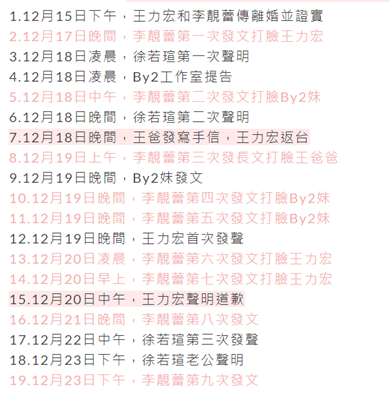

在這邊先簡單地說一下王力宏婚姻風波的時間軸

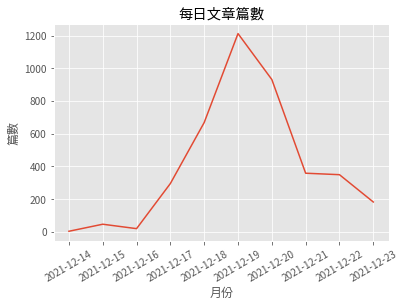

In [ ]:
plt.plot(day_count['date'], day_count['count'])
plt.title('每日文章篇數') # 標題
plt.xlabel('月份') # x軸標題
plt.ylabel('篇數') # y軸標題
plt.xticks(rotation=30) # 旋轉x刻度避免重疊
plt.show()

+ 觀察折線圖，可以發現事件的相關文章在 12/16 過後數量有增加的趨勢。(12月15日中午，王力宏證實和李靚蕾離婚，原因並未正面回應)
+ 12/19 討論聲量達到高峰 (12月17日深夜，李靚蕾長文爆料王力宏出軌、召妓、私生活混亂)

#### 2.2 資料清理
+ 去除NA值
+ 移除PTT會出現的格式用字
+ 去除不是中文、英文、數字的字詞

In [ ]:
# 移除內容為na值的資料
MetaData.dropna(subset = ["sentence"], inplace=True)
#移除PTT貼新聞時會出現的格式用字
MetaData['sentence'] = MetaData.sentence.apply(lambda x: re.sub('(媒體來源|記者署名|完整新聞標題|完整新聞內文|完整新聞連結|(或短網址)|備註:|備註請放最後面|違者新聞文章刪除)', '', x))
MetaData['sentence'] = MetaData.sentence.apply(lambda x: re.sub('(http|https)://.*', '', x))
# 去除非中文、英文、數字的字詞
MetaData['sentence'] = MetaData.sentence.apply(lambda x: re.sub('[^\u4e00-\u9fa50-9A-Za-z]+', '', x))

# 將資料轉為string格式
MetaData['sentence'] = MetaData.sentence.apply(lambda x: str(x))

In [ ]:
MetaData.head(3)

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence
0,[問卦]王力宏結束8年婚姻,2021/12/14,23:20:09,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,qq326,Gossiping,14,5,3,剛剛蘋果新聞跳出來的這是真的嗎我國中女同學超哈他的真的太驚訝嚕應該是真的
1,[新聞]王力宏結束8年婚姻！ 被爆已辦妥離婚手,2021/12/14,23:27:46,https://www.ptt.cc/bbs/Gossiping/M.1639524469....,qq326,Gossiping,349,221,26,1蘋果新聞網2娛樂中心台北報導3王力宏結束8年婚姻被爆已辦妥離婚手續4金曲歌王王力宏驚傳和李...
2,[問卦]為什麼王力宏一直被傳出是同性戀??,2021/12/14,23:33:01,https://www.ptt.cc/bbs/Gossiping/M.1639524783....,pipiboygay,Gossiping,67,36,4,奇怪為什麼王力宏一直被外界傳說是同性戀即使他都已經結婚生子小孩都三個了這個傳聞都始終沒有消失...


In [ ]:
Reviews['cmtContent'] = Reviews.cmtContent.apply(lambda x: re.sub('[^\u4e00-\u9fa5]+', '', x))
Reviews.head(3)
#Reviews['cmtContent']

,artTitle,artDate,artTime,artUrl,artPoster,artCat,cmtPoster,cmtStatus,cmtDate,cmtContent
0,[問卦]王力宏結束8年婚姻,2021/12/14,23:20:09,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,qq326,Gossiping,TWilde,推,2021-12-15 07:20:00,花田裡犯了錯
1,[問卦]王力宏結束8年婚姻,2021/12/14,23:20:09,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,qq326,Gossiping,kutkin,推,2021-12-15 07:20:00,乾就說他是鈣吧
2,[問卦]王力宏結束8年婚姻,2021/12/14,23:20:09,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,qq326,Gossiping,yoshilin,→,2021-12-15 07:21:00,不知離婚要付多少錢


#### 2.3 Jieba中文斷詞、匯入字典
中文文集我們使用`jieba`套件進行斷詞與移除停用字

In [ ]:
#設定繁體中文詞庫
jieba.set_dictionary('./dict/dict.txt.big')
#新增自定義字典
jieba.load_userdict('./dict/user_dict.txt')
#新增stop words
#jieba.analyse.set_stop_words('./dict/stop_words.txt') #jieba.analyse.extract_tags才會作用
with open('./dict/stopwords.txt',encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

Building prefix dict from /content/drive/My Drive/final report/dict/dict.txt.big ...
Loading model from cache /tmp/jieba.u13d9d4e3ebf6192db980ead4f4b4cf90.cache
Loading model cost 1.392 seconds.
Prefix dict has been built successfully.


In [ ]:
 def getToken(row):
    
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w) > 1] # 篩選不在停用字的字與字元數大於1的字詞
    return seg_list

In [ ]:
MetaData['word'] = MetaData.sentence.apply(getToken)

In [ ]:
MetaData_token = MetaData.explode('word') # 將word欄位展開

In [ ]:
MetaData_token.head(3)

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence,word
0,[問卦]王力宏結束8年婚姻,2021/12/14,23:20:09,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,qq326,Gossiping,14,5,3,剛剛蘋果新聞跳出來的這是真的嗎我國中女同學超哈他的真的太驚訝嚕應該是真的,剛剛
0,[問卦]王力宏結束8年婚姻,2021/12/14,23:20:09,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,qq326,Gossiping,14,5,3,剛剛蘋果新聞跳出來的這是真的嗎我國中女同學超哈他的真的太驚訝嚕應該是真的,蘋果新聞
0,[問卦]王力宏結束8年婚姻,2021/12/14,23:20:09,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,qq326,Gossiping,14,5,3,剛剛蘋果新聞跳出來的這是真的嗎我國中女同學超哈他的真的太驚訝嚕應該是真的,這是


In [ ]:
Reviews['word'] = Reviews.cmtContent.apply(getToken)

In [ ]:
Reviews_token = Reviews.explode('word') # 將word欄位展開

In [ ]:
Reviews_token.head(3)

,artTitle,artDate,artTime,artUrl,artPoster,artCat,cmtPoster,cmtStatus,cmtDate,cmtContent,word
0,[問卦]王力宏結束8年婚姻,2021/12/14,23:20:09,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,qq326,Gossiping,TWilde,推,2021-12-15 07:20:00,花田裡犯了錯,花田裡
0,[問卦]王力宏結束8年婚姻,2021/12/14,23:20:09,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,qq326,Gossiping,TWilde,推,2021-12-15 07:20:00,花田裡犯了錯,犯了錯
1,[問卦]王力宏結束8年婚姻,2021/12/14,23:20:09,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,qq326,Gossiping,kutkin,推,2021-12-15 07:20:00,乾就說他是鈣吧,NaN


In [ ]:
# 合併斷詞後的本文與留言
data = pd.concat([MetaData_token.loc[:,["artDate","artUrl","word"]],Reviews_token.loc[:,["artDate","artUrl","word"]]],axis=0)
data.head()

,artDate,artUrl,word
0,2021/12/14,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,剛剛
0,2021/12/14,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,蘋果新聞
0,2021/12/14,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,這是
0,2021/12/14,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,真的
0,2021/12/14,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,我國


In [ ]:
#轉換日期格式
data['artDate'] = pd.to_datetime(data['artDate'], format="%Y/%m/%d")

In [ ]:
#計算每天不同字的詞頻
word_count = data.groupby(['artDate','word'],as_index=False).size()
word_count.sort_values(by=['size'], ascending=False,inplace=True)  #排序
word_count = word_count[word_count['size']>3]  #過濾出現太少次的字
word_count.head(10)

,artDate,word,size
64181,2021-12-19,真的,2221
62332,2021-12-19,王力宏,2109
45572,2021-12-19,力宏,1749
67873,2021-12-19,蕾神,1641
95790,2021-12-20,王力宏,1601
97433,2021-12-20,真的,1556
31354,2021-12-18,王力宏,1527
80726,2021-12-20,力宏,1341
46687,2021-12-19,台灣,1285
100721,2021-12-20,蕾神,1277


由於"真的"這個詞出現次數太多，為了得到更明確的分析結果，因此後續會將它納入停用字中。

In [ ]:
# 資料進行斷詞，為list的格式
#data = MetaData.copy()
#token_df = data.assign(wordlist = data['sentence'].apply(jieba.lcut))
#token_df.head(3)

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence,word,wordlist
0,[問卦]王力宏結束8年婚姻,2021/12/14,23:20:09,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,qq326,Gossiping,14,5,3,剛剛蘋果新聞跳出來的這是真的嗎我國中女同學超哈他的真的太驚訝嚕應該是真的,"[剛剛, 蘋果新聞, 這是, 真的, 我國, 女同學, 超哈, 真的, 驚訝, 真的]","[剛剛, 蘋果新聞, 跳, 出來, 的, 這是, 真的, 嗎, 我國, 中, 女同學, 超哈..."
1,[新聞]王力宏結束8年婚姻！ 被爆已辦妥離婚手,2021/12/14,23:27:46,https://www.ptt.cc/bbs/Gossiping/M.1639524469....,qq326,Gossiping,349,221,26,1蘋果新聞網2娛樂中心台北報導3王力宏結束8年婚姻被爆已辦妥離婚手續4金曲歌王王力宏驚傳和李...,"[蘋果新聞網, 娛樂中心, 台北, 王力宏, 結束, 婚姻, 辦妥, 離婚, 手續, 金曲,...","[1, 蘋果新聞網, 2, 娛樂中心, 台北, 報導, 3, 王力宏, 結束, 8, 年, ..."
2,[問卦]為什麼王力宏一直被傳出是同性戀??,2021/12/14,23:33:01,https://www.ptt.cc/bbs/Gossiping/M.1639524783....,pipiboygay,Gossiping,67,36,4,奇怪為什麼王力宏一直被外界傳說是同性戀即使他都已經結婚生子小孩都三個了這個傳聞都始終沒有消失...,"[奇怪, 王力宏, 外界, 同性戀, 結婚, 生子, 小孩, 三個, 始終, 消失, 傳出,...","[奇怪, 為, 什麼, 王力宏, 一直, 被, 外界, 傳說, 是, 同性戀, 即使, 他,..."


#### 2.4 去除停用字

為了提高準確度，我們會將停用字移除，例如：空格、標點符號、語助詞...等。<br>
兩種方式： 1.匯入檔案 2.參數形式手動加入

In [ ]:
stopwords = []

#新增stop words
with open('./dict/stopwords.txt',encoding="utf-8") as f:
    stopwords = [line.strip() for line in f.readlines()]
    
# 參數形式手動加入停用字
user_stop = ["真的"]
for i in user_stop:
    stopwords.append(i)

上方計算詞頻可以看到 "真的" 有很多，所以在這加入停用字

In [ ]:
# 移除停用字的 function
def remove_stop(listt):
    result = [re.sub(r'-', '', word) for word in listt]
    result = [word for word in result if len(word)>1] 
    result = list(filter(lambda x : x not in stopwords, result)) 
    return result

In [ ]:
# list 刪掉 stopwords
token_df = token_df.assign( remove_stopwords = token_df['wordlist'].apply(remove_stop))
print("remove_stopwords 為 wordlist 移除停用字後的結果：")
token_df.head(3)

remove_stopwords 為 wordlist 移除停用字後的結果：


,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence,word,wordlist,remove_stopwords
0,[問卦]王力宏結束8年婚姻,2021/12/14,23:20:09,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,qq326,Gossiping,14,5,3,剛剛蘋果新聞跳出來的這是真的嗎我國中女同學超哈他的真的太驚訝嚕應該是真的,"[剛剛, 蘋果新聞, 這是, 真的, 我國, 女同學, 超哈, 真的, 驚訝, 真的]","[剛剛, 蘋果新聞, 跳, 出來, 的, 這是, 真的, 嗎, 我國, 中, 女同學, 超哈...","[剛剛, 蘋果新聞, 這是, 我國, 女同學, 超哈, 驚訝]"
1,[新聞]王力宏結束8年婚姻！ 被爆已辦妥離婚手,2021/12/14,23:27:46,https://www.ptt.cc/bbs/Gossiping/M.1639524469....,qq326,Gossiping,349,221,26,1蘋果新聞網2娛樂中心台北報導3王力宏結束8年婚姻被爆已辦妥離婚手續4金曲歌王王力宏驚傳和李...,"[蘋果新聞網, 娛樂中心, 台北, 王力宏, 結束, 婚姻, 辦妥, 離婚, 手續, 金曲,...","[1, 蘋果新聞網, 2, 娛樂中心, 台北, 報導, 3, 王力宏, 結束, 8, 年, ...","[蘋果新聞網, 娛樂中心, 台北, 王力宏, 結束, 婚姻, 辦妥, 離婚, 手續, 金曲,..."
2,[問卦]為什麼王力宏一直被傳出是同性戀??,2021/12/14,23:33:01,https://www.ptt.cc/bbs/Gossiping/M.1639524783....,pipiboygay,Gossiping,67,36,4,奇怪為什麼王力宏一直被外界傳說是同性戀即使他都已經結婚生子小孩都三個了這個傳聞都始終沒有消失...,"[奇怪, 王力宏, 外界, 同性戀, 結婚, 生子, 小孩, 三個, 始終, 消失, 傳出,...","[奇怪, 為, 什麼, 王力宏, 一直, 被, 外界, 傳說, 是, 同性戀, 即使, 他,...","[奇怪, 王力宏, 外界, 同性戀, 結婚, 生子, 小孩, 三個, 始終, 消失, 傳出,..."


## C. 資料的分析過程 與 視覺化的分析結果&解釋

### 3.lexicon-base 情緒分析
進行基於情緒字典的情緒分析，首先需要準備情緒字典後再將字典與斷詞後的文章進行合併


#### 3.1準備LIWC字典
* 全名Linguistic Inquiry and Word Counts，由心理學家Pennebaker於2001出版
* 分為正向情緒與負向情緒

In [ ]:
filepath = ['negative','positive']
d_liwc = []
for file in filepath:
    filename = f"./dict/liwc/{file}.txt"
    with open(filename, 'r', encoding='UTF-8-sig') as f:
        d_liwc.append([f.read().split(","),file])

In [ ]:
df_liwc = pd.DataFrame(d_liwc,columns = ['word','sentiments']).explode('word',ignore_index = True)
df_liwc

,word,sentiments
0,一無所有,negative
1,七竅生煙,negative
2,上當,negative
3,下流,negative
4,下等,negative
...,...,...
1706,魅力,positive
1707,鮮明,positive
1708,鮮美,positive
1709,鼓勵,positive


#### 3.2情緒字典與斷詞結果進行合併
將情緒字典與斷詞結果進行合併。<br>
可以先觀察每天的ptt文章數量，大約在12/16之後才比較有討論的聲量，並在12/19有最高聲量之後便開始下降。

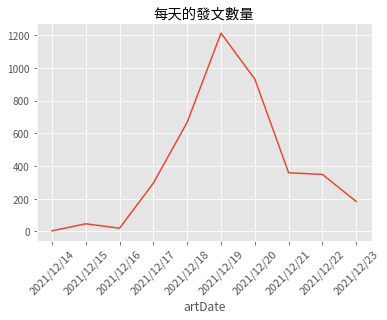

In [ ]:
data_datecount = pd.DataFrame(MetaData.groupby('artDate').size(),columns = ['count'])

plt.figure(figsize=(6,4))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式

plt.title('每天的發文數量')
plt.xlabel('artDate')
plt.xticks(rotation= 45, fontsize=11)
plt.plot(data_datecount.index,data_datecount['count'].tolist())

#### 3.3正負向情緒分數聲量折線圖圖
分別畫出文集中，正向（positive）與負向（negative）情緒的折線圖

In [ ]:
#文章和與LIWC情緒字典做合併
data_liwc = pd.merge(data, df_liwc, on=['word'],how='left')

#算出每天情緒總和(sentiment_count)
sentiment_count = data_liwc.groupby(['artDate','sentiments'],as_index=False).size()
sentiment_count.head()

,artDate,sentiments,size
0,2021-12-14,negative,64
1,2021-12-14,positive,44
2,2021-12-15,negative,429
3,2021-12-15,positive,250
4,2021-12-16,negative,71


In [ ]:
data.head()

,artDate,artUrl,word
0,2021-12-14,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,剛剛
0,2021-12-14,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,蘋果新聞
0,2021-12-14,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,這是
0,2021-12-14,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,真的
0,2021-12-14,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,我國


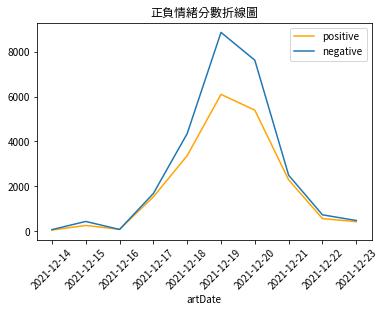

In [ ]:
p = sentiment_count[sentiment_count['sentiments']=='positive']
n = sentiment_count[sentiment_count['sentiments']=='negative']

plt.figure(figsize=(6,4))   # 顯示圖框架大小 (寬,高)
plt.style.use("default")     # 使用ggplot主題樣式
plt.rcParams["font.family"] = "Taipei Sans TC Beta" #使中文能正常顯示
plt.title('正負情緒分數折線圖')
plt.plot(p['artDate'].tolist(), p['size'], label='positive',color="orange")
plt.plot(n['artDate'].tolist(), n['size'], label='negative')
plt.xticks(rotation= 45, fontsize=10)
plt.legend() #顯示圖例
#plt.axvline(x='2021-03-18', color="red", ls="-")
plt.xlabel('artDate')
plt.show()

畫出每天的情緒總分數，可以看到情緒主要是以負面為主。

#### 3.4正負向情緒分數比例折線圖圖

In [ ]:
sentiment_count_r = sentiment_count.assign(ratio = sentiment_count.groupby(['artDate'], as_index=False)
                                           .apply(lambda x: x['size'] / sum(x['size'])).reset_index(level=0, drop=True))

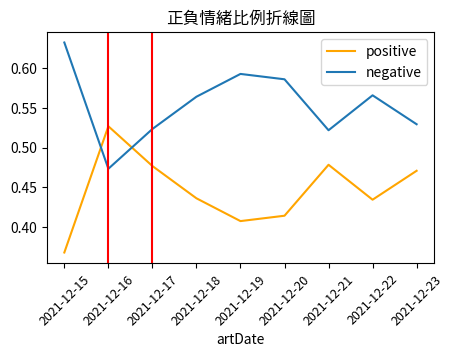

In [ ]:
sentiment_count_r = sentiment_count_r[sentiment_count_r['artDate'] > '2021/12/14']
p = sentiment_count_r[sentiment_count_r['sentiments']=='positive']
n = sentiment_count_r[sentiment_count_r['sentiments']=='negative']

plt.figure(figsize=(5,3))   # 顯示圖框架大小 (寬,高)
plt.style.use("default")     # 使用ggplot主題樣式
plt.rcParams["font.family"] = "Taipei Sans TC Beta" #使中文能正常顯示
plt.title('正負情緒比例折線圖')
plt.plot(p['artDate'].tolist(), p['ratio'], label='positive',color="orange")
plt.plot(n['artDate'].tolist(), n['ratio'], label='negative')
plt.xticks(rotation= 45, fontsize=9)
plt.legend() #顯示圖例
plt.axvline(x=datetime.strptime('2021-12-16', "%Y-%m-%d"), color="red", ls="-")
plt.axvline(x=datetime.strptime('2021-12-17', "%Y-%m-%d"), color="red", ls="-")
#plt.axvline(x=datetime.strptime('2021-03-25', "%Y-%m-%d"), color="red", ls="-")
#plt.axvline(x=datetime.strptime('2021-03-26', "%Y-%m-%d"), color="red", ls="-")
plt.xlabel('artDate')
plt.show()

透過上圖我們可以發現12/16到12/17是一次情緒由負轉正的轉折，而之後情緒又由正轉負，並且負向一直高於正向。<br>
12/16正面情緒偏高可能是因為，15號剛證實離婚，原因尚不明，所以有一些正面護航聲量，並且民眾在情緒上不會過於負面。<br>
但17號經過女方爆料，各種負面情緒偏高的文章就撲面而來。

#### 3.5文字雲
針對不同日期畫出該天的文字雲，如果文字雲中的字詞大小越大，代表出現頻率越高

In [ ]:
def Wc_dict(df, Date, countB, countS):
    wc_df = (df.query('artDate == @Date') # 篩選日期
             .query('size < @countB')# 篩選最大數量
             .query('size > @countS')# 篩選最小數量
             .sort_values('size', ascending=False))
    wc_dict = dict(zip(wc_df['word'], wc_df['size'])) #建立成dictionary
    
    return wc_dict

**2021-12-19 文字雲**

這裡先挑出數量最多的19號來看

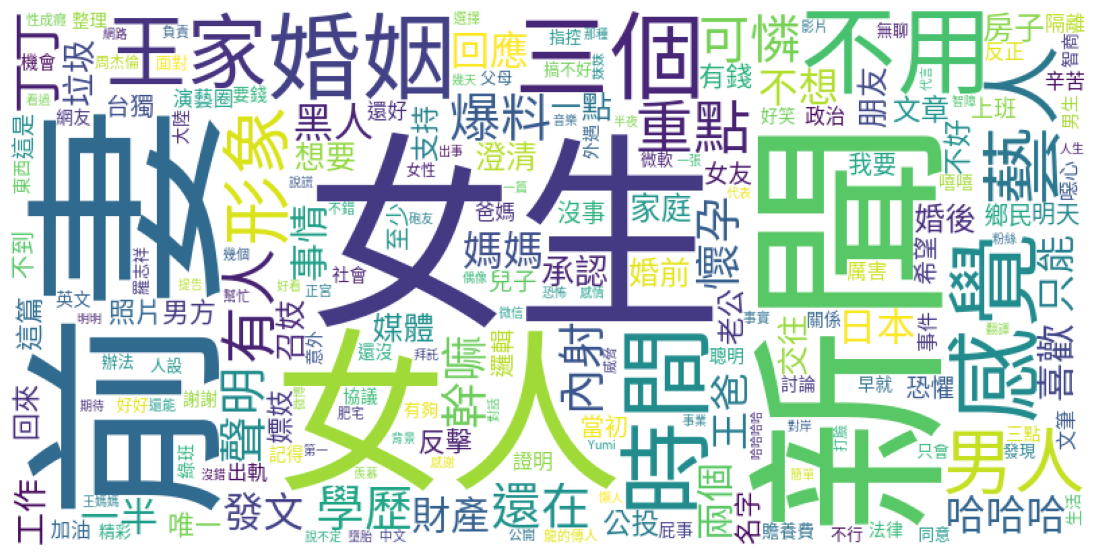

In [ ]:
dict_1219 = Wc_dict(word_count,"2021-12-19",450,50)

font = './SourceHanSansTW-Regular.otf' #中文字型路徑
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
wordcloud.generate_from_frequencies(dict_1219)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis("off") #把作圖的座標軸關掉 
plt.show()

發現有"女生"、"女人"、"前妻"、"婚姻"、"新聞"、"王家"、"形象"、"懷孕"等，主要與王力宏和他的家庭有關。因為19號那天，王力宏的父親出面挺王力宏，不料被女方光速打臉，而王力宏本人也再度發聲。因此，有許多在討論王家與他們對待女方或是王力宏歷代女友的相關消息。

**2021-12-20 文字雲**

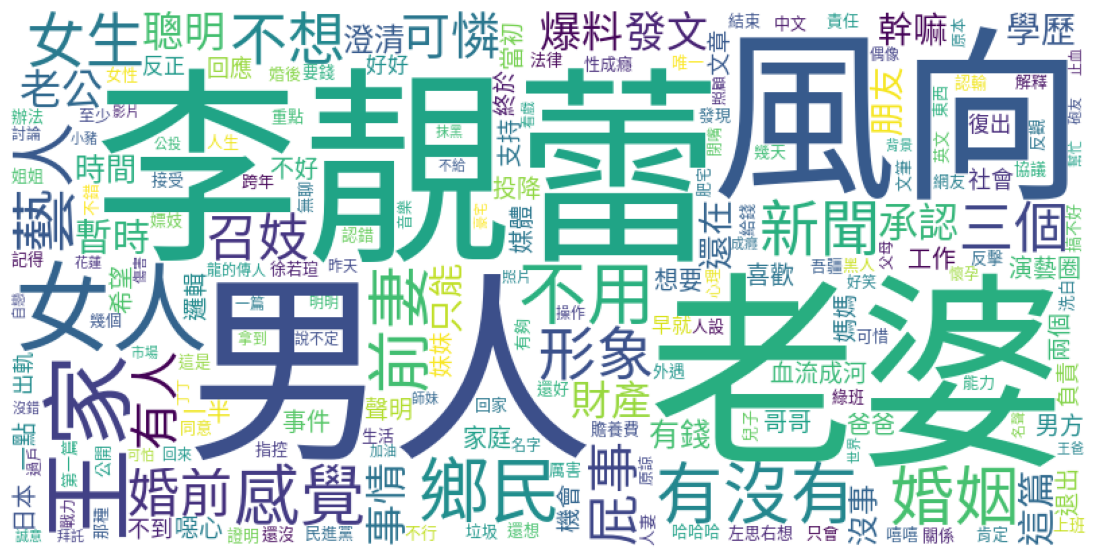

In [ ]:
dict_1220 = Wc_dict(word_count,"2021-12-20",450,50)

font = './SourceHanSansTW-Regular.otf' #中文字型路徑
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
wordcloud.generate_from_frequencies(dict_1220)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis("off") #把作圖的座標軸關掉 
plt.show()

這一天有"李靚蕾"、"老婆"、"男人"、"風向"等，20號李靚蕾再列5點打臉王力宏，讓整個風向偏向女方，而王力宏也終於道歉，宣布暫退演藝圈。

#### 3.6情緒代表字
從整個文集中計算出正負向情緒字的出現詞頻，並找出情緒的代表字

In [ ]:
sentiment_sum = (word_count.merge(df_liwc, on='word')
                 .groupby(['word', 'sentiments'], as_index=False)
                 .agg({'size': 'sum'}))
sentiment_sum = sentiment_sum.sort_values(by=['size'], ascending=False)  #排序
sentiment_sum.head()

,word,sentiments,size
613,離婚,negative,2862
72,八卦,negative,2213
139,喜歡,positive,844
365,朋友,positive,806
117,可憐,negative,803


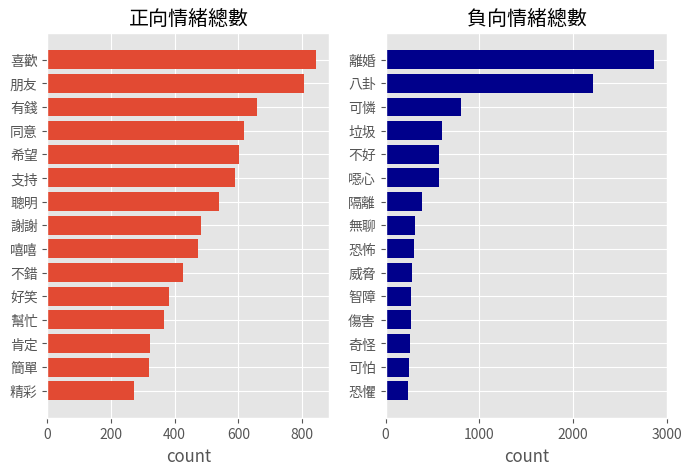

In [ ]:
p_sum = sentiment_sum[sentiment_sum["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = sentiment_sum[sentiment_sum["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(8,5))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

plt.subplot(121)
plt.title('正向情緒總數')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('負向情緒總數')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")


plt.show()

另外，也可以依據不同日期觀察情緒代表字的變化

**2021-12-19 正負情緒代表字**

In [ ]:
sentiment_date_sum = (word_count.merge(df_liwc, on='word')
                 .groupby(['artDate', 'word', 'sentiments'], as_index=False)
                 .agg({'size': 'sum'}))

#篩選日期
sentiment_1219 = sentiment_date_sum[sentiment_date_sum['artDate']=="2021-12-19"].sort_values(by=['size'], ascending=False)
sentiment_1219.head()

,artDate,word,sentiments,size
636,2021-12-19,八卦,negative,870
1067,2021-12-19,離婚,negative,757
671,2021-12-19,可憐,negative,299
689,2021-12-19,喜歡,positive,234
697,2021-12-19,垃圾,negative,231


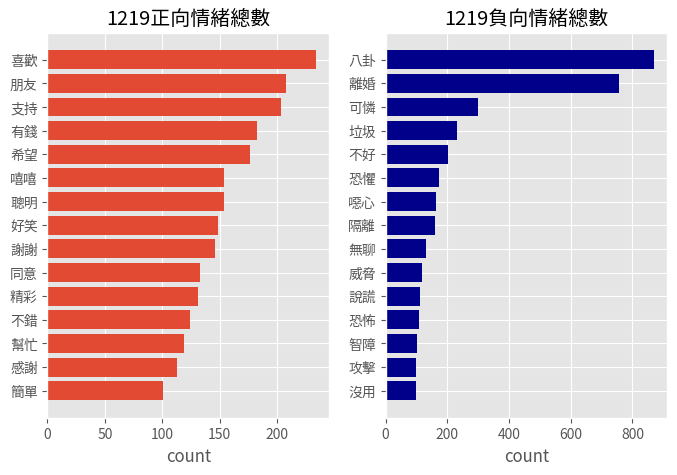

In [ ]:
p_sum = sentiment_1219[sentiment_1219["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = sentiment_1219[sentiment_1219["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(8,5))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

plt.subplot(121)
plt.title('1219正向情緒總數')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('1219負向情緒總數')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")


plt.show()

In [ ]:
sentiment_date_sum = (word_count.merge(df_liwc, on='word')
                 .groupby(['artDate', 'word', 'sentiments'], as_index=False)
                 .agg({'size': 'sum'}))

#篩選日期
sentiment_1220 = sentiment_date_sum[sentiment_date_sum['artDate']=="2021-12-20"].sort_values(by=['size'], ascending=False)
sentiment_1220.head()

,artDate,word,sentiments,size
1557,2021-12-20,離婚,negative,933
1143,2021-12-20,八卦,negative,451
1178,2021-12-20,可憐,negative,235
1477,2021-12-20,聰明,positive,227
1366,2021-12-20,朋友,positive,214


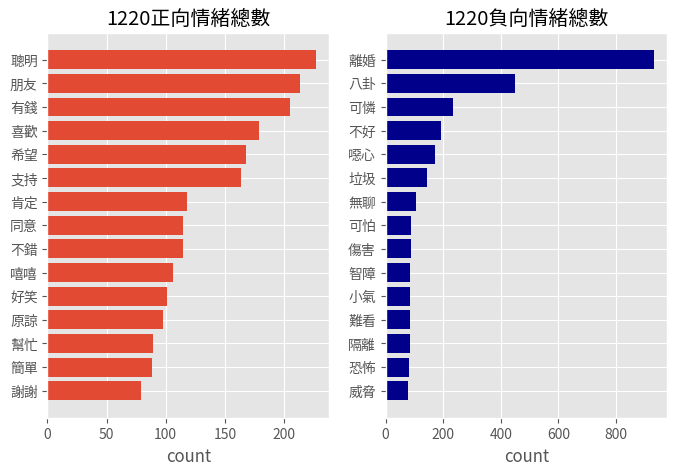

In [ ]:
p_sum = sentiment_1220[sentiment_1220["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = sentiment_1220[sentiment_1220["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(8,5))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

plt.subplot(121)
plt.title('1220正向情緒總數')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('1220負向情緒總數')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")


plt.show()

由以上正負情緒字詞總數圖可以觀察到12/19、12/20或是整個文集出現的正負面情緒字詞都相當類似，正面的詞彙的前幾名都是：喜歡、朋友、聰明、有錢等；負面的詞彙大多數則是出現離婚、八卦、可憐、垃圾等。

#### 3.7歸類正負面文章
* 之前的情緒分析大部分是全部的詞彙加總，接下來將正負面情緒的文章分開，看看能不能發現一些新的東西。
* 接下來歸類文章，將每一篇文章正負面情緒的分數算出來，然後大概分類文章屬於正面還是負面。

In [ ]:
article_type = (data.merge(df_liwc, on='word')
                .groupby(['artUrl', 'sentiments'], as_index=False)
                .size()
                .pivot_table(index='artUrl', columns='sentiments', values='size', fill_value=0)
                .reset_index(['artUrl'])
               )
article_type.head()

sentiments,artUrl,negative,positive
0,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,4,2
1,https://www.ptt.cc/bbs/Gossiping/M.1639524469....,50,35
2,https://www.ptt.cc/bbs/Gossiping/M.1639524783....,10,7
3,https://www.ptt.cc/bbs/Gossiping/M.1639527313....,7,7
4,https://www.ptt.cc/bbs/Gossiping/M.1639527873....,4,4


In [ ]:
article_type['type'] = article_type.apply(lambda x: 'positive' if x['positive'] > x['negative'] else 'negative',axis=1)
article_type.groupby('type', as_index=False).size()

,type,size
0,negative,2588
1,positive,1460


#### 3.8正負情緒文章數量統計圖

In [ ]:
article_type_date = article_type.merge(MetaData.loc[:,["artUrl", "artDate"]], how = 'left', on = 'artUrl')
article_type_date = article_type_date.groupby(['artDate','type'], as_index=False).size()
#article_type_date

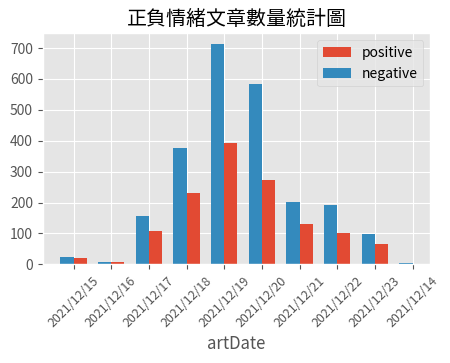

In [ ]:
ap = article_type_date[(article_type_date["type"]=="positive")&(article_type_date["artDate"]>="2021/12/14")&(article_type_date["artDate"]<="2021/12/24")]
an = article_type_date[(article_type_date["type"]=="negative")&(article_type_date["artDate"]>="2021/12/14")&(article_type_date["artDate"]<="2021/12/24")]

plt.figure(figsize=(5,3))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示
plt.title('正負情緒文章數量統計圖')
plt.xlabel('artDate')
plt.bar(ap['artDate'],ap['size'],align="edge",width=0.35,label="positive")
plt.bar(an['artDate'],an['size'],align="edge",width=-0.35,label="negative")
plt.legend()
plt.xticks(rotation= 45, fontsize=9)
plt.xlabel('artDate')
plt.show()

從這張圖可以發現，由正負面字詞所歸類出來的文章，每天都是負面文章大於正面文章數。

#### 3.9情緒關鍵字
把正面和負面的文章挑出來，並和斷詞結果合併

In [ ]:
positive_article = article_type[article_type["type"]=="positive"].merge(data, how = 'left', on = 'artUrl')
negative_article = article_type[article_type["type"]=="negative"].merge(data, how = 'left', on = 'artUrl')

**情緒關鍵字:負面情緒文章**

In [ ]:
negative_article = (negative_article.merge(df_liwc, on='word')
                    .groupby(['word', 'sentiments'], as_index=False)
                    .size()
                    .sort_values('size', ascending = False))

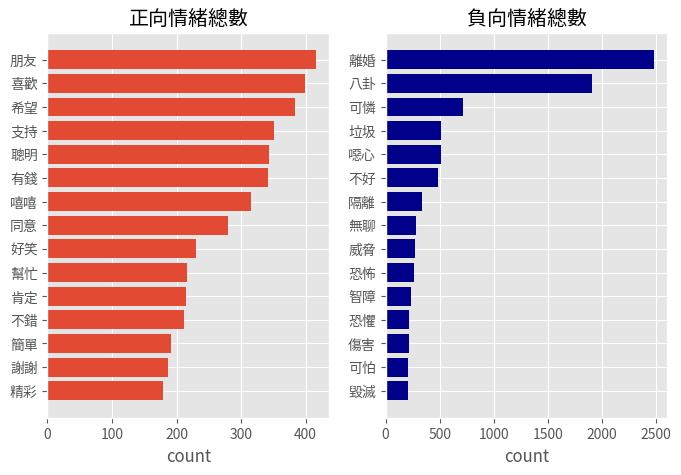

In [ ]:
p_sum = negative_article[negative_article["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = negative_article[negative_article["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(8,5))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

plt.subplot(121)
plt.title('正向情緒總數')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('負向情緒總數')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")


plt.show()

**情緒關鍵字:正面情緒文章**

In [ ]:
positive_article = (positive_article.merge(df_liwc, on='word')
                    .groupby(['word', 'sentiments'], as_index=False)
                    .size()
                    .sort_values('size', ascending = False))

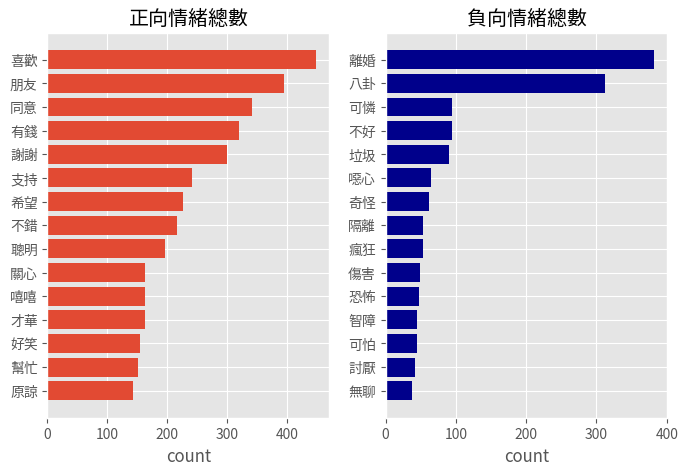

In [ ]:
p_sum = positive_article[positive_article["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = positive_article[positive_article["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(8,5))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

plt.subplot(121)
plt.title('正向情緒總數')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('負向情緒總數')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")


plt.show()

從正負面情緒圖觀察發現，正面和負面的關鍵字沒有甚麼顯著的差異，負面情緒較高的文章出現較多的「離婚」、「八卦」、「可憐」等字詞，推測為網友是以看八卦的心情來看待王力宏離婚此事，並且感到可憐;正面情緒較高的文章出現較多的「喜歡」、「朋友」、「支持」等字詞，推測為王力宏和Yumi為朋友而已，並且支持李靚蕾的決定。

### 4.LDA 主題模型

#### 4.1 訓練 LDA 模型

將文章斷詞結果儲存為 list 資料形態，一篇文章為一個 list ，其中 element 為詞彙。

In [ ]:
token_data = token_df['remove_stopwords'].tolist()

In [ ]:
for i in range(2,5):
    print("第 " + str(i+1) + " 篇文章前5個字：")
    for j in range(0,5):
        print(token_data[i][j], end=' ')
    print('\n')

第 3 篇文章前5個字：
奇怪 王力宏 外界 同性戀 結婚 

第 4 篇文章前5個字：
兩人 會作 詞曲 王力宏 唱歌 

第 5 篇文章前5個字：
早就 預言 力宏 八年 甲方乙方 



In [ ]:
#id2word 將斷詞結果生成字典，裡頭為資料集裡出現的字
id2word = corpora.Dictionary(token_data)
print('資料集字典：')
print(id2word)

資料集字典：
Dictionary(33901 unique tokens: ['剛剛', '女同學', '我國', '蘋果新聞', '超哈']...)


+ 將斷詞結果建構語料庫(corpus)，利用語料庫把每篇文章數字化。<br>
+ 每篇文章、每個詞彙都被賦予一個 ID 及頻率(word_id，word_frequency)。<br>

In [ ]:
corpus = [id2word.doc2bow(text) for text in token_data]
print('第一篇文章 corpus :')
print(corpus[0][:10])

第一篇文章 corpus :
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


In [ ]:
ldamodel = gensim.models.ldamulticore.LdaMulticore(
    corpus=corpus, # 文檔語料庫
    id2word=id2word, # 詞彙字典
    num_topics=3, # 生成幾個主題數
    random_state=1500, # 亂數
    iterations = 2500, # 每個文章訓練的次數
    passes=10, # 模型訓練次數
)

我們將主題數設為：3

#### 4.2 查看 LDA 主題代表字

當 LDA 模型訓練好之後，我們可以查看每個主題的單詞分佈。<br>
num_words = 選擇要查看每個主題前幾個字。<br>

In [ ]:
# 每個主題重要的前十個關鍵字
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.027*"王力宏" + 0.015*"阿妹" + 0.008*"台灣" + 0.007*"有沒有" + 0.007*"力宏" + 0.007*"八卦" + 0.006*"中國" + 0.005*"專輯" + 0.004*"蕾神" + 0.004*"歌手"')
(1, '0.022*"王力宏" + 0.007*"離婚" + 0.007*"李靚蕾" + 0.006*"小孩" + 0.005*"力宏" + 0.005*"孩子" + 0.004*"女方" + 0.004*"結婚" + 0.004*"蕾神" + 0.003*"關係"')
(2, '0.013*"蕾神" + 0.011*"彈頭" + 0.011*"Yumi" + 0.010*"王力宏" + 0.008*"離婚" + 0.007*"By2" + 0.007*"小孩" + 0.007*"李靚蕾" + 0.007*"發文" + 0.006*"黑人"')


根據每個主題的詞彙分佈來猜測，可分為以下主題：

+ 主題一：王力宏被爆之前約看電影的緋聞對象是張惠妹，也曾為阿妹的專輯寫歌、合唱。
+ 主題二：王力宏與李靚蕾(蕾神)的離婚消息，李靜蕾長文爆料王力宏愛小孩，被逼5年生三胎。
+ 主題三：捲入離婚大戰的相關人物討論，例如:王力宏被爆料婚前婚後出軌By2 Yumi、南拳媽媽彈頭順勢批評和爆料黑人陳建州。


#### 4.3 查看 LDA 模型指標
+ **Pointwise Mutual Information** : <br>
自然語言處理中，想要探討兩個字之間是否存在某種關係。<br>
例如：某些字會一起出現，可能帶有某些訊息，因此這個可以用 PMI 來計算，數字越大越好。
+ **perplexity** :<br>
perplexity 也是評估的指標之一，廣泛用於語言模型的評估，意思為複雜度，因此數字要越小越好。

In [ ]:
PMI_model_lda = CoherenceModel(model=ldamodel, texts=token_data, coherence='c_uci')
PMI_lda = PMI_model_lda.get_coherence()
print('這個主題的 PMI score: ', PMI_lda)

這個主題的 PMI score:  -1.995005851447946


In [ ]:
perplexity = ldamodel.log_perplexity(corpus)
print('這個主題的 Perplexity Score: ', perplexity)

這個主題的 Perplexity Score:  -9.466218191018639


#### 4.4 透過指標找出最佳主題數

透過建立不同主題數的模型，並以上述所說的**判斷指標**來找出最佳的主題數。<br>
這裡以 perplexity 為指標，因為gensim套件的問題，我們將其進行轉換。<br>

由於若將主題數設為4或4以上呈現的主題都相當模糊或是會重疊。因此這裡我們選擇主題數 3 來做分析。

In [ ]:
topic_num_list = np.arange(2, 10, 2)
result = []
for topic_num in topic_num_list:
    # perplexity
    tmp_ldamodel = gensim.models.ldamulticore.LdaMulticore(
        corpus = corpus,
        num_topics = topic_num ,
        id2word=id2word,
        random_state = 1500,
        passes=5,
        iterations=2000
        )
    tmp_perplexity = tmp_ldamodel.log_perplexity(corpus)
    temp_skleran = np.exp(-1. * tmp_perplexity)
    
    result.append({"topic_num": topic_num, "gensim_perplexity": tmp_perplexity, "perplexity":temp_skleran})

,topic_num,gensim_perplexity,perplexity
0,2,-9.495326,13297.430880
1,4,-9.616087,15004.228258
2,6,-9.663390,15731.021210
3,8,-9.674010,15898.970557


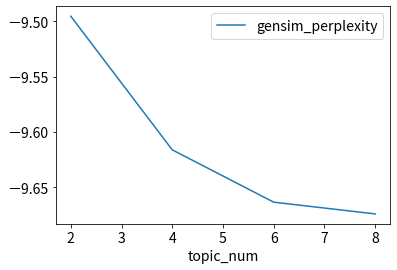

In [ ]:
result = pd.DataFrame(result)
result.plot.line(x='topic_num', y='gensim_perplexity', label='gensim_perplexity')
result

,topic_num,gensim_perplexity,perplexity
0,2,-9.495326,13297.430880
1,4,-9.616087,15004.228258
2,6,-9.663390,15731.021210
3,8,-9.674010,15898.970557


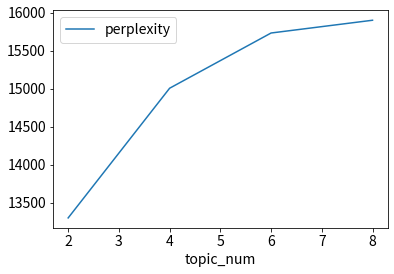

In [ ]:
result = pd.DataFrame(result)
result.plot.line(x='topic_num', y='perplexity', label='perplexity')
result

### 5.LDA 視覺化呈現

#### 5.1 產生 LDAvis 結果

以下用主題數 3 來做 LDAvis 的結果範例:

In [ ]:
ldaVis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary=ldamodel.id2word)
pyLDAvis.save_html(ldaVis,'ldaVis.html')
IPython.display.HTML(filename= "ldaVis.html")

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


#### 5.2 查看 Document 主題時間上分佈

以每筆發文的"主題分佈"中分數最大的主題當作該文章的主題。<br>
再根據時間來做分析，了解不同的時間點討論的主題大多為什麽，以比例的方式呈現。

In [ ]:
# 取得每筆發文的主題分佈
topics_doc = ldamodel.get_document_topics(corpus,minimum_probability=0)

# 把每筆發文的主題分佈存成list
probabilities = [ [entry[1] for entry in doc] for doc in topics_doc ]
print(probabilities[0:3])

# 找出probabilities最大的主題 存入 doc_list
doc_list = [np.argmax(t) for t in probabilities]

[[0.8929278, 0.064342864, 0.04272934], [0.0357279, 0.8834987, 0.08077338], [0.020691989, 0.7955165, 0.18379158]]


In [ ]:
# 將結果放進 DataFrame裏
data['topic'] = doc_list

In [ ]:
# 將 artDate 轉換為 Python 日期時間
MetaData.artDate = pd.to_datetime(MetaData['artDate'])
Reviews.artDate = pd.to_datetime(Reviews['artDate'])
data.artDate = pd.to_datetime(data['artDate'])

In [ ]:
# groupby 日期、主題並計算文章篇數
date_topic = pd.DataFrame({
    'count':data.groupby(['artDate','topic']).size()
})

date_topic = date_topic.reset_index()
date_topic = date_topic.groupby(['artDate','topic']).sum().reset_index()

In [ ]:
date_df = date_topic.pivot_table(index='artDate', values='count', columns='topic').fillna(0).reset_index()
date_df.columns = ['artDate', 'topic0', 'topic1', 'topic2']
# 前面日期變period形式要把他變回timestamp形式 --> to_timestamp：以便於畫圖
date_df = date_df.set_index('artDate')
date_df

,topic0,topic1,topic2
artDate,,,
2021-12-14,1.0,2.0,0.0
2021-12-15,10.0,32.0,4.0
2021-12-16,4.0,13.0,2.0
2021-12-17,112.0,175.0,8.0
2021-12-18,244.0,404.0,19.0
2021-12-19,367.0,779.0,66.0
2021-12-20,226.0,652.0,53.0
2021-12-21,103.0,233.0,22.0
2021-12-22,101.0,203.0,44.0


In [ ]:
date_df.index

DatetimeIndex(['2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17',
               '2021-12-18', '2021-12-19', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23'],
              dtype='datetime64[ns]', name='artDate', freq=None)

可以看到在不同時間點，特定主題談論篇幅的多寡

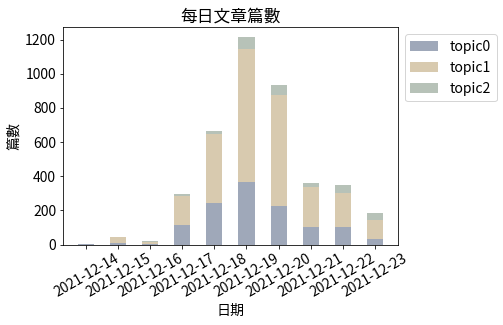

In [ ]:
color = ["#9FA8B9", "#D8CAAF", "#B7C2B8", "#EAD0D5"]
column = ['topic0', 'topic1', 'topic2']
temp_bottom = 0

for i in range(0,3):
    if(i>0):
        temp_bottom = temp_bottom + date_df[column[i-1]]
        plt.bar(date_df.index, date_df[column[i]] ,color=color[i], bottom=temp_bottom ,label=column[i] , width=0.5)
    else: # 主題一 bottom 為 0
        plt.bar(date_df.index, date_df[column[i]] ,color=color[i], label=column[i] , width=0.5)     


plt.title('每日文章篇數') # 標題
plt.xlabel('日期') # x軸標題
plt.ylabel('篇數') # y軸標題
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1,1), loc='upper left') #標示的位置
plt.show()

根據上面的圖表，搭配時事推估：
+ Topic 0 (事件相關人物：張惠妹)由日期的主題分布可以發現，相較於其他兩個主題，討論聲量明顯少許多。
+ Topic 1 (離婚大戰) 的討論聲量於 12月17日~19日處於顛峰，19日後討論大幅下滑。
+ Topic 2 (事件相關人物討論: Yumi、彈頭) 於12月18日~23日的討論聲量有增加的趨勢，推測是因為發生許多延伸事件:
  + Yumi支線:
    + 18日，網友爆料王力宏與BY2 Yumi的地下情，Yumi報警控網友誹謗，並貼出報案單佐證，然而同日又被李靚蕾反駁
    + 19日晚間，李靚蕾再次重砲反擊，並曝光Yumi將通訊軟體Whatsapp頭貼換成裸照的照片
    + 22日上午，網友驚傳Yumi吞藥輕生
  + 彈頭支線:
    + 22日，南拳媽媽彈頭發文批評黑人陳建州
    + 23日，李妍瑾參戰，爆料曾被彈頭約砲，2人隔空筆戰

In [ ]:
#轉換成比例
ratio_df = date_df.copy()
ratio_df['sum'] = ratio_df.topic0 + ratio_df.topic1 + ratio_df.topic2

for i in range(0,3):
    ratio_df['topic'+str(i)] = ratio_df['topic'+str(i)] / ratio_df['sum']

ratio_df

,topic0,topic1,topic2,sum
artDate,,,,
2021-12-14,0.333333,0.666667,0.000000,3.0
2021-12-15,0.217391,0.695652,0.086957,46.0
2021-12-16,0.210526,0.684211,0.105263,19.0
2021-12-17,0.379661,0.593220,0.027119,295.0
2021-12-18,0.365817,0.605697,0.028486,667.0
2021-12-19,0.302805,0.642739,0.054455,1212.0
2021-12-20,0.242750,0.700322,0.056928,931.0
2021-12-21,0.287709,0.650838,0.061453,358.0
2021-12-22,0.290230,0.583333,0.126437,348.0


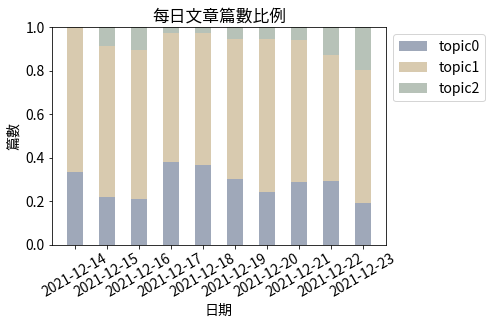

In [ ]:
temp_bottom = 0

for i in range(0,3):
    if(i>0):
        temp_bottom = temp_bottom + ratio_df[column[i-1]]
        plt.bar(ratio_df.index, ratio_df[column[i]] ,color=color[i], bottom=temp_bottom ,label=column[i], width=0.5)
    else: # 主題一 bottom 為 0
        plt.bar(ratio_df.index, ratio_df[column[i]] ,color=color[i], label=column[i], width=0.5)

plt.title('每日文章篇數比例') # 標題
plt.xlabel('日期') # x軸標題
plt.ylabel('篇數') # y軸標題
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1,1), loc='upper left') #標示的位置
plt.show()

+ Topic 0：王力宏被爆之前約看電影的緋聞對象是張惠妹，也曾為阿妹的專輯寫歌、合唱。
+ Topic 1：王力宏與李靚蕾(蕾神)的離婚消息，李靜蕾長文爆料王力宏愛小孩，被逼5年生三胎。
+ Topic 2：捲入離婚大戰的相關人物討論，例如:王力宏被爆料婚前婚後出軌By2 Yumi、南拳媽媽彈頭順勢批評和爆料黑人陳建州。

根據上面的圖表，搭配時事推估：
+ Topic 2 的比例於18日以後逐漸增加，推測是因為 Yumi、彈頭的案件不斷延燒、出現新劇情。

##### 查看三個主題的內容，是否符合預測。

In [ ]:
## 主題一: 張惠妹
data[(data["topic"]==0)&(data["artTitle"].str.contains("張惠妹|阿妹"))][["artTitle","sentence","topic"]].sample(n=5)

,artTitle,sentence,topic
3596,[問卦]王力宏跟張惠妹有傳過誹聞?,剛剛新聞說20年前王力宏跟張惠妹有傳過緋聞蕾神之槌有說看電影的時候誹聞女友坐在後面到底是不是...,0
4003,[問卦]王力宏、張惠妹、李靚蕾等人的時間軸,1995年12月19日王力宏在19歲發行首張專輯情敵貝多芬1996年7月阿妹在張雨生的兩伊戰...,0
3558,[問卦]張惠妹20年前pr值多少,20年前張惠妹已經是有好幾張暢銷專輯的歌手也算是滿漂亮的對比下王力宏才剛開始紅張惠妹20年前...,0
3872,Re:[新聞]張惠妹戀王力宏超切心！ 2件事讓她看清,現在看起來一切都有跡可循也張惠妹在2004年跟王力宏傳出緋聞2005年就離開台灣去波士頓遊學...,0
3799,[新聞]張惠妹戀王力宏超切心！ 2件事讓她看清,蘋果日報林丞偉張惠妹戀王力宏超切心2件事讓她看清渣男有多絕情淚崩了王力宏曾與張惠妹阿妹李玟舒...,0


In [ ]:
## 主題二: 王力宏、李靜蕾離婚大戰、孩子相關討論
data[(data["topic"]==1)&(data["artTitle"].str.contains("離婚|小孩|孩子"))][["artTitle","sentence","topic"]].sample(n=5)

,artTitle,sentence,topic
28,Re:[問卦]王力宏離婚害我被我老婆嗆,女人可以自己去賺錢養家阿叫男生在家帶小孩煮飯洗碗難道不行能在家帶小孩煮飯洗碗帶小孩是很爽的事...,1
3949,Re:[問卦]王力宏確定李靚蕾生的三個小孩都他的?,沒什麼在記別人id的我這幾天記下了兩個id原po是其中之一理由就是發文內容實在太超過了雖說觀...,1
4053,Re:[問卦]李這樣發文，讓小孩一輩子活在陰影中?,王力宏的DNA不論小孩身材智商都贏在起跑點王力宏的資產能讓小孩跟自己過上不錯生活至於王力宏死...,1
148,Re:[新聞]李靚蕾被離婚沉默2天毀滅式反擊，控王力宏有砲友召妓,蠻慘的文章邏輯也清清楚楚真的不愧為曾經的學霸不過也可見就算是學霸一樣是被媒體包裝的偶像騙得團...,1
3953,Re:[問卦]王力宏確定李靚蕾生的三個小孩都他的?,就你可以支持女方別人就想支持男方女說男約砲男為何不能說女討客兄女受荷爾蒙影響沒性慾可以說男方...,1


In [ ]:
## 主題三:By2 Yumi、彈頭延伸事件
data[(data["topic"]==2)&(data["artTitle"].str.contains("Yumi|彈頭"))][["artTitle","sentence","topic"]].sample(n=5)

,artTitle,sentence,topic
1513,[新聞]Yumi被揭「報警造假」恐違法 By2急現機,Yumi被揭報警造假恐違法By2急現機場包緊緊編輯張士哲報導發佈時間202112191742...,2
3567,[新聞]By2妹妹Yumi驚傳吞藥輕生！ 友發文批王,1ettoday2記者陳芊秀綜合報導3快訊By2妹妹Yumi驚傳吞藥輕生友發文批王力宏出事不...,2
4061,Re:[問卦]彈頭kobe李妍瑾？,獨家李妍瑾爆曾被他約砲轟有什麼資格講黑人彈頭腿很短高攀不起彈頭另闢戰場回嗆李妍瑾對不起妹太多...,2
3727,[問卦]Yumi已經出院回家了，感謝大家關心,孫雨工作人員回應網友曝Yumi吞藥輕生網友做個小孩007發文稱By2孫雨Yumi原名白緯玲吞...,2
3697,[問卦]Yumi是不是可以得金鐘影后,對啊我覺得三金欠她一金如果Yumi去演戲應該可以跟各大影后角逐金鐘影后是說她們只有唱歌嗎我覺...,2


### 6.社群網路圖

#### 6.1 基本網路圖

In [ ]:
data.head(1)

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence,topic
0,[問卦]王力宏結束8年婚姻,2021-12-14,23:20:09,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,qq326,Gossiping,14,5,3,剛剛蘋果新聞跳出來的這是真的嗎我國中女同學超哈他的真的太驚訝嚕應該是真的,0


In [ ]:
Reviews.head(1)

,artTitle,artDate,artTime,artUrl,artPoster,artCat,cmtPoster,cmtStatus,cmtDate,cmtContent
0,[問卦]王力宏結束8年婚姻,2021-12-14,23:20:09,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,qq326,Gossiping,TWilde,推,2021-12-15 07:20:00,:花田裡犯了錯


In [ ]:
# 把reviews中 cmtPoster(回覆者), cmtStatus(推噓), cmtContent(留言) 合併到 data的資料表
posts_Reviews = Reviews.loc[:,["artUrl", "cmtPoster", "cmtStatus", "cmtContent"]]
posts_Reviews  = pd.merge(data, posts_Reviews, how="right", on="artUrl")
posts_Reviews = posts_Reviews[posts_Reviews["commentNum"]>0]
posts_Reviews['topic'] = posts_Reviews.topic.apply(lambda x: int(x))

In [ ]:
posts_Reviews.head(2)

,artTitle,artDate,artTime,artUrl,artPoster,artCat,commentNum,push,boo,sentence,topic,cmtPoster,cmtStatus,cmtContent
0,[問卦]王力宏結束8年婚姻,2021-12-14,23:20:09,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,qq326,Gossiping,14.0,5.0,3.0,剛剛蘋果新聞跳出來的這是真的嗎我國中女同學超哈他的真的太驚訝嚕應該是真的,0,TWilde,推,:花田裡犯了錯
1,[問卦]王力宏結束8年婚姻,2021-12-14,23:20:09,https://www.ptt.cc/bbs/Gossiping/M.1639524012....,qq326,Gossiping,14.0,5.0,3.0,剛剛蘋果新聞跳出來的這是真的嗎我國中女同學超哈他的真的太驚訝嚕應該是真的,0,kutkin,推,:乾就說他是鈣吧


In [ ]:
# 取出 cmtPoster(回覆者)、artPoster(發文者)、artUrl(文章連結) 三個欄位
link = posts_Reviews.loc[:,["cmtPoster", "artPoster", "artUrl"]]
link.head(3)

,cmtPoster,artPoster,artUrl
0,TWilde,qq326,https://www.ptt.cc/bbs/Gossiping/M.1639524012....
1,kutkin,qq326,https://www.ptt.cc/bbs/Gossiping/M.1639524012....
2,yoshilin,qq326,https://www.ptt.cc/bbs/Gossiping/M.1639524012....


In [ ]:
len(link)

202092

使用 cmtPoster(回覆者)、artPoster(發文者) 建立兩者的連結，這裡先嘗試使用前100筆資料(總共有202092筆資料)

In [ ]:
# Create network plot 
G = nx.Graph()

# 建立 nodes 間的連結
for i in range(0,200):
    G.add_edge(link["cmtPoster"][i], link["artPoster"][i])

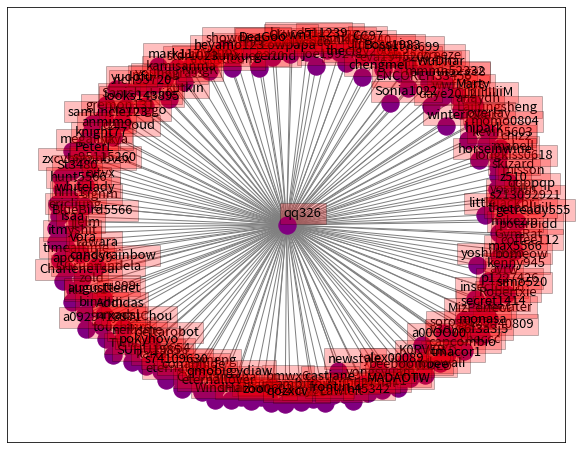

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# 建立節點的布局 (節點位置)
pos = nx.spring_layout(G, k=2)

# networks
nx.draw_networkx(G, pos,
                 font_size=16,
#                  width=weights,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# 增加 labels
for key, value in pos.items():
    x, y = value[0]+.07, value[1]+.045 #調整label的位置(右上)
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

#### 6.2 資料篩選
資料篩選的方式：

- 文章:文章日期、留言數(commentNum)
- link、node:degree

看一下文章留言數大概都多少(方便後面篩選)

Text(0, 0.5, 'count')

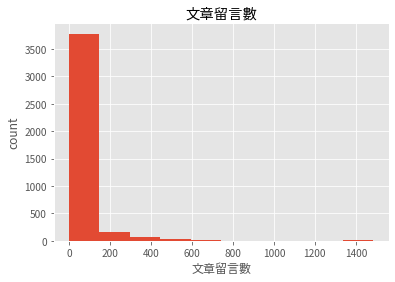

In [ ]:
plt.figure(figsize=(6,4))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示
plt.hist(data["commentNum"])

plt.title('文章留言數')
plt.xlabel('文章留言數')
plt.ylabel('count')

依據發文數或回覆數篩選post和review

In [ ]:
# 帳號發文篇數
pd.DataFrame(data.groupby("artPoster").size(),columns = ['count']).reset_index().sort_values(by="count",ascending=False)

,artPoster,count
1570,poppylove,25
190,ILike58,16
1583,protoss,15
444,VVizZ,15
734,chirex,15
...,...,...
1155,johnny811025,1
1154,john5380,1
438,URaybaobao,1
1152,jo4,1


In [ ]:
# 檢視人數
print("發文者數量總共:",len(set(posts_Reviews["artPoster"])))
print("回覆者數量總共:",len(set(posts_Reviews["cmtPoster"])))

發文者數量總共: 2055
回覆者數量總共: 25950


##### 標記所有出現過的使用者
- poster：只發過文、發過文+留過言
- replyer：只留過言

In [ ]:
# 用set()得到不重複的集合
s = set(list(posts_Reviews["artPoster"])+list(posts_Reviews["cmtPoster"]))

In [ ]:
allPoster = pd.DataFrame(list(s),columns=["user"])

In [ ]:
allPoster["type"] = allPoster["user"].apply(lambda x: "poster" if x in list(data["artPoster"]) else "replyer")

In [ ]:
allPoster.head(5)

,user,type
0,ak4760607,replyer
1,zong780405,replyer
2,maxliao,replyer
3,landpro,replyer
4,Cchild,replyer


#### 6.3 以日期篩選社群

+ 12/17 深夜，李靚蕾發長文爆料王力宏出軌、召妓、私生活混亂
+ 12/18 後， Yumi、彈頭事件延燒<br>
因此，我們挑出21日的文章和回覆

In [ ]:
# 篩選日期為2021-12-21 且 留言數>200的文章
posts_Reviews_1221 = (posts_Reviews.query('artDate == "2021-12-21"')
                      .query('commentNum>200')
                      .groupby(['cmtPoster','artUrl'],as_index=False).size()
                     )

In [ ]:
# 篩選有人在同一篇文章重複回覆大於5次
posts_Reviews_1221 = posts_Reviews_1221.query('size>5')
posts_Reviews_1221.head(3)

,cmtPoster,artUrl,size
39,AlohaVC,https://www.ptt.cc/bbs/Gossiping/M.1640085024....,19
40,AlohaVC,https://www.ptt.cc/bbs/Gossiping/M.1640089233....,14
123,CVIVIC,https://www.ptt.cc/bbs/Gossiping/M.1640105325....,11


In [ ]:
# 因為需要artPoster所以merge link，之後使用drop_duplicates去除重複資料
link_1221 = pd.merge(posts_Reviews_1221,link,on=["cmtPoster","artUrl"],how="left").drop_duplicates()
link_1221.reset_index(inplace=True, drop=True) #重設index
link_1221.head(3)

,cmtPoster,artUrl,size,artPoster
0,AlohaVC,https://www.ptt.cc/bbs/Gossiping/M.1640085024....,19,yochiya
1,AlohaVC,https://www.ptt.cc/bbs/Gossiping/M.1640089233....,14,DuDu
2,CVIVIC,https://www.ptt.cc/bbs/Gossiping/M.1640105325....,11,DALUGI


In [ ]:
# Create network plot 
# nx.Graph()為無向圖 ; nx.DiGraph()為有向圖
G = nx.Graph()

# 建立 nodes 間的連結
for i in range(0,len(link_1221)):
    G.add_edge(link_1221["cmtPoster"][i], link_1221["artPoster"][i])

##### 加上nodes的顯示資訊
用使用者的身份來區分點的顏色
- poster:red(有發文)
- replyer:blue(只有回覆文章)

In [ ]:
# 設定node顏色，red(有發文), blue(只有回覆)
color_map = []
for node in G.nodes():
    if allPoster[allPoster["user"]==node]["type"].item()=="replyer":
        color_map.append('blue')
    else: 
        color_map.append('red') 

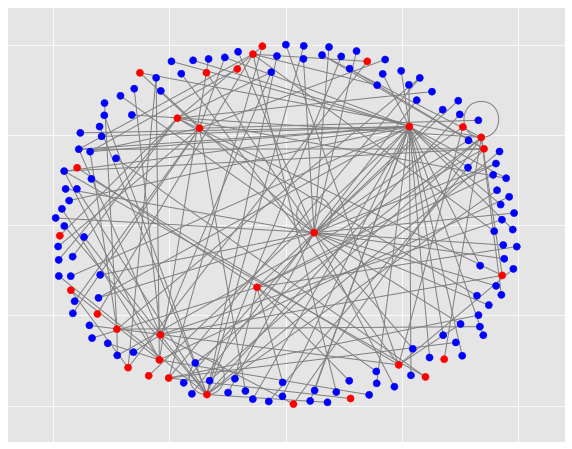

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# 建立節點的布局 (節點位置)
pos = nx.spring_layout(G, k=2)

# networks
nx.draw_networkx(G, pos,
                 node_size=50,
                 edge_color='grey',
                 node_color=color_map,
                 with_labels = False,
                 ax=ax)
    
plt.show()

為點加上帳號名字，用degree篩選要顯示出的使用者(degree>5)，以免圖形被密密麻麻的文字覆蓋。 

In [ ]:
# 刪除degree<1的點
to_be_removed = [x for  x in G.nodes() if G.degree(x) <= 1]
for x in to_be_removed:
    G.remove_node(x)

In [ ]:
# 設定node顏色，red(有發文), blue(只有回覆)
color_map = []
for node in G.nodes():
    if allPoster[allPoster["user"]==node]["type"].item()=="replyer":
        color_map.append('blue')
    else: 
        color_map.append('red') 

In [ ]:
# 找出degree>5的點
degrees = [node for (node, val) in G.degree() if val>5]
degrees

['zkowntu', 'ILike58', 'cynthia12708']

In [ ]:
# 把找出的人加進label中
labels = {}  
for node in G.nodes():
    if node in degrees:
        #set the node name as the key and the label as its value 
        labels[node] = node

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


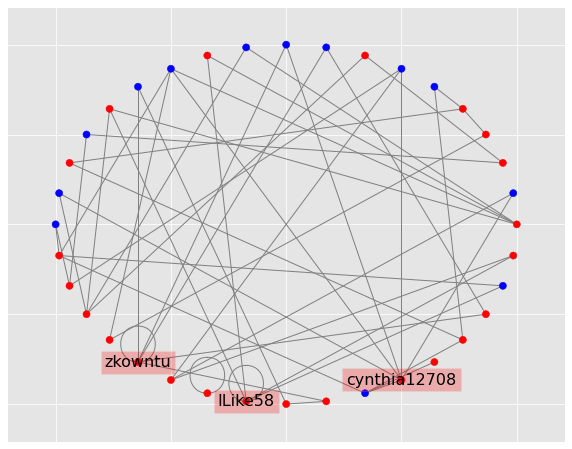

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# 建立節點的布局 (節點位置)
# pos = nx.spring_layout(G, k=2)
pos = nx.shell_layout(G)

# networks
nx.draw_networkx(G, pos,
                 node_size=50,
                 edge_color='grey',
                 node_color=color_map,
                 with_labels = False,
                 ax=ax)

# 增加 labels
nx.draw_networkx_labels(G,pos,labels,font_size=16,font_color='black',
                        bbox=dict(facecolor='red', alpha=0.25),
                        horizontalalignment='center')
    
plt.show()

##### 計算Centrality  
找出重要的點  

In [ ]:
# degree centrality
degree = nx.degree_centrality(G)

In [ ]:
# eigenvector centrality
eigenvector = nx.eigenvector_centrality(G)

In [ ]:
# pagerank centrality
pr = nx.pagerank(G, alpha=0.9)

In [ ]:
# betweenness centrality
between = nx.betweenness_centrality(G)

In [ ]:
# 找出degree centrality最高的前5名
print("degree centrality:",sorted(degree, key=degree.get, reverse=True)[:5])

# 找出eigenvector centrality最高的前5名
print("eigenvector centrality:",sorted(eigenvector, key=eigenvector.get, reverse=True)[:5])

# 找出pagerank centrality最高的前5名
print("pagerank centrality:",sorted(pr, key=pr.get, reverse=True)[:5])

# 找出betweenness centrality最高的前5名
print("betweenness centrality:",sorted(between, key=between.get, reverse=True)[:5])

degree centrality: ['zkowntu', 'ILike58', 'cynthia12708', 'yochiya', 'DALUGI']
eigenvector centrality: ['cynthia12708', 'zkowntu', 'soria', 'ILike58', 'yochiya']
pagerank centrality: ['zkowntu', 'cynthia12708', 'ILike58', 'NICKSHOW', 'DALUGI']
betweenness centrality: ['cynthia12708', 'pchome321', 'zkowntu', 'soria', 'NICKSHOW']


我們可以看到基本的使用者關係，但是我們希望能夠將更進階的資訊視覺化。  
例如：使用者經常參與的文章種類，或是使用者在該社群網路中是否受到歡迎。

#### 6.4 以主題篩選社群

挑選出2021-12-21當天的文章， 篩選一篇文章回覆5次以上者，且文章留言數大於200則， 文章主題歸類為0(張惠妹)、1(離婚事件)與2(Yumi、彈頭延伸案件)， 欄位只取：cmtPoster(評論者), artPoster(發文者), artUrl(文章連結), topic(主題)

In [ ]:
# 加上topic
topic_1221 = pd.merge(link_1221,posts_Reviews,on=["cmtPoster","artUrl"],how="left")[["cmtPoster","artUrl","topic"]].drop_duplicates()

In [ ]:
# 因為需要artPoster所以merge link，之後使用drop_duplicates去除重複資料
link_1221_topic = pd.merge(topic_1221,link,on=["cmtPoster","artUrl"],how="left").drop_duplicates()
link_1221_topic.reset_index(inplace=True, drop=True) #重設index
link_1221_topic.head(3)

,cmtPoster,artUrl,topic,artPoster
0,AlohaVC,https://www.ptt.cc/bbs/Gossiping/M.1640085024....,2,yochiya
1,AlohaVC,https://www.ptt.cc/bbs/Gossiping/M.1640089233....,2,DuDu
2,CVIVIC,https://www.ptt.cc/bbs/Gossiping/M.1640105325....,1,DALUGI


In [ ]:
# Create network plot 
G = nx.Graph()

# 建立 nodes 間的連結，及edge的顏色
color_map_edge = []
for i in range(0,len(link_1221_topic)):
    G.add_edge(link_1221_topic["cmtPoster"][i], link_1221_topic["artPoster"][i])
    if link_1221_topic["topic"][i] == 0: #以主題區分顏色
        color_map_edge.append('orange') # 主題零:張惠妹相關
    elif link_1221_topic["topic"][i] == 1:
        color_map_edge.append('green') # 主題一:離婚、小孩相關
    else: 
        color_map_edge.append('grey') # 主題三:相關人物，Yumi、彈頭相關

In [ ]:
# 刪除degree<1的點
to_be_removed = [x for  x in G.nodes() if G.degree(x) <= 1]
for x in to_be_removed:
    G.remove_node(x)

In [ ]:
# 設定node顏色，red(有發文), blue(只有回覆)
color_map = []
for node in G.nodes():
    if allPoster[allPoster["user"]==node]["type"].item()=="replyer":
        color_map.append('blue')
    else: 
        color_map.append('red') 

In [ ]:
# 找出degree>5的點
degrees = [node for (node, val) in G.degree() if val>5]
degrees
# 把找出的人加進label中
labels = {}  
for node in G.nodes():
    if node in degrees:
        #set the node name as the key and the label as its value 
        labels[node] = node

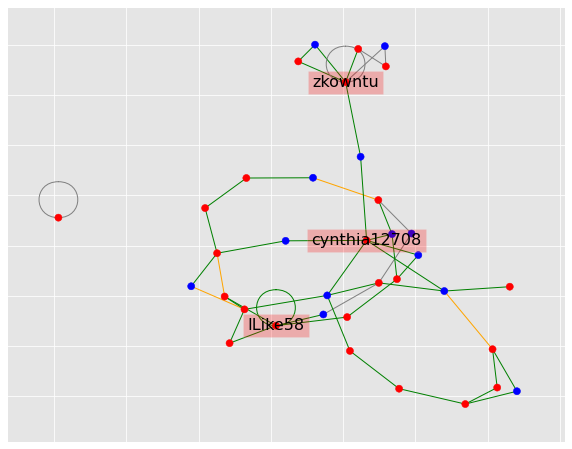

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# 建立節點的布局 (節點位置)
pos = nx.spring_layout(G,k=0.3)

# networks
nx.draw_networkx(G, pos,
                 node_size=50,
                 edge_color=color_map_edge,
                 node_color=color_map,
                 with_labels = False,
                 ax=ax)

# 增加 labels
nx.draw_networkx_labels(G,pos,labels,font_size=16,font_color='black',
                        bbox=dict(facecolor='red', alpha=0.25),
                        horizontalalignment='center')
    
plt.show()

+ 橘色: 張惠妹相關
+ 綠色: 王力宏、李靚蕾離婚、小孩議題相關
+ 灰色: Yumi、彈頭相關

可以看出:
+ cynthia12708、ILike58 較多為雙方離婚和小孩的相關留言
+ zkowntu 較多為雙方離婚和延伸人物兩個主題的相關留言

#### 6.5 使用者是否受到歡迎

PTT的回覆有三種，推文、噓文、箭頭，我們只要看推噓就好，因此把箭頭清掉。

In [ ]:
# 加上status
status_1221 = pd.merge(link_1221,posts_Reviews,on=["cmtPoster","artUrl"],how="left")[["cmtPoster","artUrl","topic","cmtStatus"]].drop_duplicates()
# 去掉"→"的資料
status_1221 = status_1221[status_1221["cmtStatus"]!="→"]

In [ ]:
# 因為需要artPoster所以merge link，之後使用drop_duplicates去除重複資料
link_1221_status = pd.merge(status_1221,link,on=["cmtPoster","artUrl"],how="left").drop_duplicates()
link_1221_status.reset_index(inplace=True, drop=True) #重設index
link_1221_status.head(3)

,cmtPoster,artUrl,topic,cmtStatus,artPoster
0,DCHC,https://www.ptt.cc/bbs/Gossiping/M.1640075388....,2,推,Scorpio
1,DinoZavolta,https://www.ptt.cc/bbs/Gossiping/M.1640109456....,1,推,zkowntu
2,DinoZavolta,https://www.ptt.cc/bbs/Gossiping/M.1640109456....,1,噓,zkowntu


In [ ]:
# Create network plot 
G = nx.Graph()

# 建立 nodes 間的連結，及edge的顏色
color_map_edge_S = []
for i in range(0,len(link_1221_status)):
    G.add_edge(link_1221_status["cmtPoster"][i], link_1221_status["artPoster"][i])
    if link_1221_status["cmtStatus"][i] == "推":
        color_map_edge_S.append('orange')
    else: 
        color_map_edge_S.append('grey')    

In [ ]:
# 刪除degree<1的點
to_be_removed = [x for  x in G.nodes() if G.degree(x) <= 1]
for x in to_be_removed:
    G.remove_node(x)

In [ ]:
# 設定node顏色，red(有發文), blue(只有回覆)
color_map = []
for node in G.nodes():
    if allPoster[allPoster["user"]==node]["type"].item()=="replyer":
        color_map.append('blue')
    else: 
        color_map.append('red') 

In [ ]:
# 找出degree>3的點
degrees = [node for (node, val) in G.degree() if val>3]

# 把找出的人加進label中
labels = {}  
for node in G.nodes():
    if node in degrees:
        #set the node name as the key and the label as its value 
        labels[node] = node

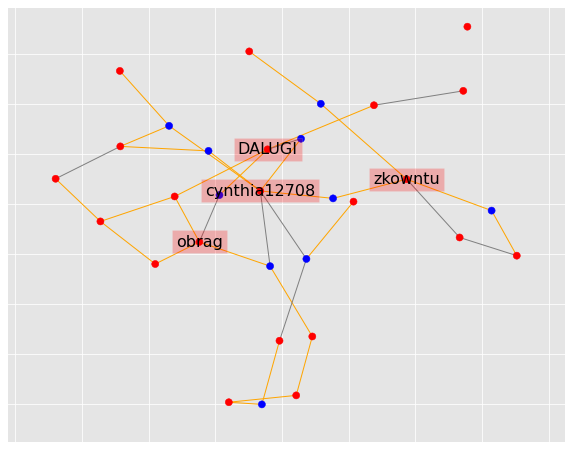

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# 建立節點的布局 (節點位置)
pos = nx.spring_layout(G, k=0.4)
# pos = nx.shell_layout(G)

# networks
nx.draw_networkx(G, pos,
                 node_size=50,
                 edge_color=color_map_edge_S,
                 node_color=color_map,
                 with_labels = False,
                 ax=ax)

# 增加 labels
nx.draw_networkx_labels(G,pos,labels,font_size=16,font_color='black',
                        bbox=dict(facecolor='red', alpha=0.25),
                        horizontalalignment='center')
    
plt.show()

可以發現本次的討論中幾乎都是推文(黃色)、噓文(灰色)較少

## D. 結論

2021/12/14-2021/12/24 王力宏離婚事件沸沸揚揚
1. 12/19討論聲量達到高峰，總體情緒以負面為主<BR>
>19號王力宏父親出面挺，不料被女方光速打臉，而王力宏本人也再度發聲。因此，有許多在討論王家與他們對待女方或是王力宏歷代女友的相關消息，文字雲中發現有"女生"、"女人"、"前妻"、"婚姻"、"新聞"、"王家"、"形象"、"懷孕"等字詞

2. 正負面情緒詞也能推測出整體支持女方的聲量高過男方
>* 負面情緒較高的文章：「離婚」、「八卦」、「可憐」等字詞
>* 正面情緒較高的文章：「喜歡」、「朋友」、「支持」等字詞<BR>


3. 透過LDA主題模型分析，我們將文章分成以下三大主題，可見網友是以這三大主軸去討論此次事件<br>
>* 主題一：力宏與阿妹
>* 主題二：王李離婚
>* 主題三：出軌名單
